In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math



In [2]:
df = pd.read_csv('../data/forest_coverage/covtype.csv')

In [3]:
df.describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [5]:
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [6]:
# color palettes
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
"muted"
"coolwarm"
"PRGn"
"YlOrBr"
"rainbow"

# hue
'Cover_Type'

'Cover_Type'

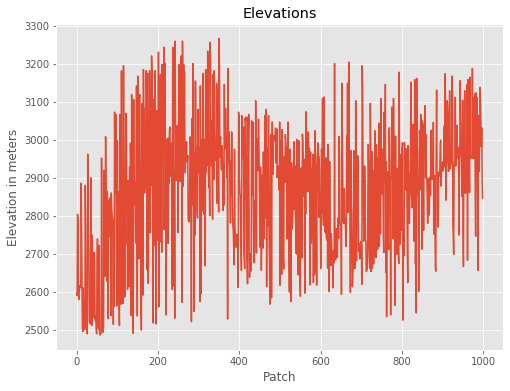

In [37]:

fig, ax = plt.subplots(figsize=(8,6))
plt.style.use('ggplot')

x_elev = range(len(df['Elevation']))
y = df['Elevation']
ax.plot(x_elev[0:999], y[0:999])
ax.set_xlabel('Patch')
ax.set_ylabel('Elevation in meters')
ax.set_title('Elevations')

fig.savefig('elevations.png')


In [8]:
conv_m_2_ft = 3.28084

elev_min = y.min()
elev_min_ft = int(round(elev_min * conv_m_2_ft))
elev_max = y.max()
elev_max_ft = int(round(elev_max * conv_m_2_ft))

print(elev_max - elev_min)
print(elev_min, elev_min_ft)
print(elev_max, elev_max_ft)

1999
1859 6099
3858 12657


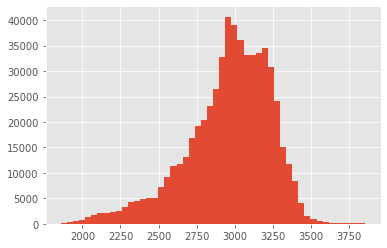

In [42]:
plt.hist(df['Elevation'], bins=50)
plt.style.use('ggplot')


# Bristlecone Pines thrive on exposed rocky slopes at elevations of 9,200 to 11,800 feet
# The Limber Pine is also very picturesque. This tree is prevalent near the timberline throughout the Colorado Rockies.
# They start growing at elevations of around 5,000 feet and will grow in elevations as high as 12,000 feet



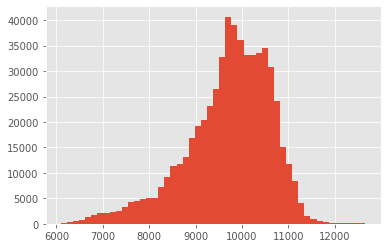

In [10]:
plt.hist(df['Elevation']*conv_m_2_ft, bins=50)
plt.show()

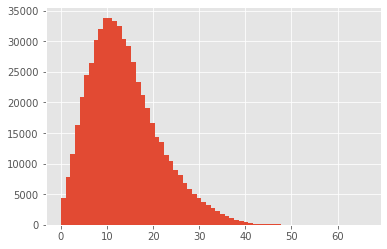

In [11]:
ax = plt.hist(df['Slope'], bins=65)
plt.show()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64


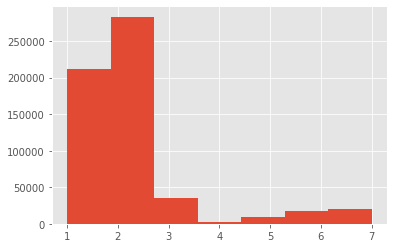

In [12]:
cover_counts = df.Cover_Type.value_counts()
print(cover_counts)

ax = plt.hist(df['Cover_Type'], bins=7)



In [13]:
df_wild_1 = df.groupby('Wilderness_Area1').get_group(1) # Rawah
df_wild_2 = df.groupby('Wilderness_Area2').get_group(1) # Neota
df_wild_3 = df.groupby('Wilderness_Area3').get_group(1) # Comanche Peak
df_wild_4 = df.groupby('Wilderness_Area4').get_group(1) # Cache la Poudre


In [14]:
nine_hundred_m2_to_acres = 0.22239484

acres_wild_1 = int(round(len(df_wild_1) * nine_hundred_m2_to_acres))
acres_wild_2 = int(round(len(df_wild_2) * nine_hundred_m2_to_acres))
acres_wild_3 = int(round(len(df_wild_3) * nine_hundred_m2_to_acres))
acres_wild_4 = int(round(len(df_wild_4) * nine_hundred_m2_to_acres))

tot_acreage_1 = 73068
tot_acreage_2 = 9924
tot_acreage_3 = 66791
tot_acreage_4 = 9238

print(acres_wild_1)
print(acres_wild_2)
print(acres_wild_3)
print(acres_wild_4)

print(acres_wild_1/tot_acreage_1)
print(acres_wild_2/tot_acreage_2)
print(acres_wild_3/tot_acreage_3)
print(acres_wild_4/tot_acreage_4)



58000
6646
56347
8221
0.7937811353807412
0.6696896412736799
0.8436316270156159
0.8899112361983114


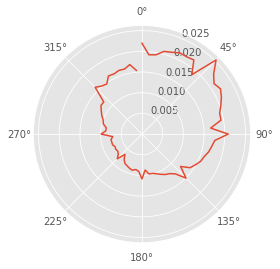

In [15]:
# fig, ax2 = plt.subplots()
ax2 = plt.subplot(111, polar=True)
# ax2.set_theta_zero_location("N", offset=90.0)
ax2.set_theta_direction(-1)

aspect_sums = df.Aspect.value_counts().sort_index()
aspect_sums[0] += aspect_sums[360]
aspect_sums = aspect_sums[0:360]
# print(aspect_sums)

summed_aspect_sums = np.add.reduceat(np.array(aspect_sums), np.arange(0, len(aspect_sums), 5))
# print(rounded_aspect_sums)
# summed_aspect_sums.append(summed_aspect_sums[0])
# print(summed_aspect_sums)

degrees = np.arange(0,360,5)
# print(degrees)
    
ax2.plot(degrees*math.pi/180, summed_aspect_sums/sum(summed_aspect_sums))
# ax2.set_theta_zero_location("N")
ax2.set_theta_offset(math.pi/2)




In [16]:
df_cart = df.iloc[:, 0:10]
df_wild = df.iloc[:, 10:14]
df_soil = df.iloc[:, 14:54]
df_binary = df.iloc[:, 10:54]

In [17]:
# df_cart

In [18]:
ax3 = fig.add_subplot()

skew_df = df.skew()
# print(skew_df)
skew_cart = df_cart.skew()
skew_wild = df_wild.skew()
skew_soil = df_soil.skew()
# skew_binary = df_binary.skew()
# print(skew_soil)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

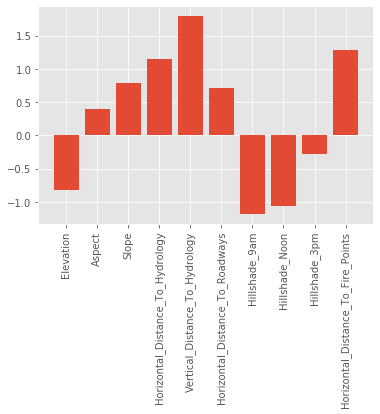

In [19]:
plt.bar(skew_cart.index, skew_cart)
plt.xticks(rotation=90)


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

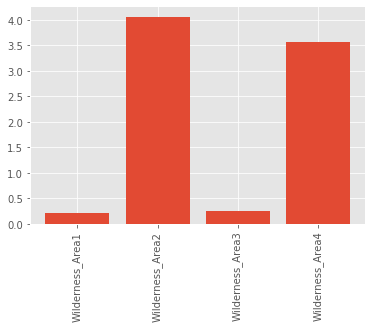

In [20]:
plt.bar(skew_wild.index, skew_wild)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 <a list of 40 Text xticklabel objects>)

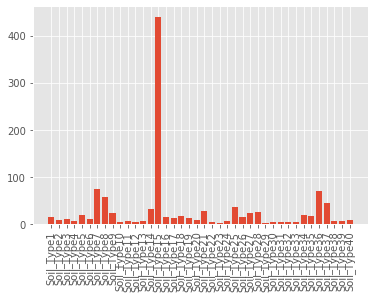

In [21]:
plt.bar(skew_soil.index, skew_soil)
plt.xticks(rotation=90)